# <span style="color:#FF00FF">Open Access Counter 1.21 (in progress)</span><br>

# also known as Pygmy Goat 


_Copyright 2021 Poppy Riddle & Dr. Colin Conrad_

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

## What is the Open Access Counter?
This is a script designed to take a list of ORCID entries and return the number of open access publications the author has. The script currently draws from the Unpaywall API to determine OA status for each text, and is currently using orcid.org to determine the list of the authors' publications. When this script is finished, it will do the following:
1. Input ORCIDs
2. Retrieve DOIs for the researchers
3. Use the DOIs to count the number of open access publications and return the result
4. Plot the results visually
5. write results to a csv file. 

#### to add?
1. pull up where it stored?

The script is designed to be supported by markdown so that it is explained clearly in an easy-to-read way.




## <span style="color:#FF00FF">issues to address in this version </span>
#### Is there a need for the school to be included on the csv import? 
#### create functions for each section so that running a function is easier and cleaner
    is it possible to save out to .py and then load and run the function?
#### revisit the orchid API? Is there a problem running it like I am?
    The current way makes it easier for others without orcid authorization to run the script. If I use the orchid API with authorization, then someone needs to have an orcid ID - thus limiting its use. 
#### Remove the descriptive statistics?
#### improve the visualization for output to png or pdf in a ready to print size. 
#### Make this exportable/usable as a webpage/nbviewer application
    See https://nbviewer.jupyter.org/github/ipython/ipython/blob/master/examples/IPython%20Kernel/Rich%20Output.ipynb for rich text with images/logos
    

    

# Step 1: Sign in
Please enter your institutional email at the prompt. Thank you!<br>
This is used to access the <i>polite</i> API request pool, which is faster!

In [1]:
email = input("Please enter your email here: ")
#regex to check format?



#### <span style="color:#FF00FF">add another sign in for ORCID authorization - perhaps as a way to make this legit?
https://orcid.org/developer-tools
    </span><br>


## Step 2: Specify the ORCID to be retrieved
The finished script should use a Python list to retrieve a series of ORCIDs. These should be manually specified, but could easily be modified to take them from a CSV file using Python's CSV library if we so choose.

### Import csv function to read into orcids
 
 There is an easy way to get lots of ORCIDs from orcid.org. Do an advanced search for the institution name. With the results, you can cut and paste into an Excel doc, then export as csv to read into here. 
 Such as this one for 'Dalhousie University'
 https://orcid.org/orcid-search/search?institution=Dalhousie%20University
 <br>
 Be sure to save your csv file in your working directory<br>
 
 #### <span style="color:#FF00FF">currently this requires the csv to meet a format requirement with a column for orcid ID and one for school. keep this? improve this?</span><br>
 

In [2]:
import pandas as pd # import pandas 
import numpy as np # imports numpy, we need this for Seaborn later
import matplotlib.pyplot as plt # notation for importing matplotlib

In [3]:
orcids = pd.read_csv('30_orcids.csv') # command pandas to import the data. Pandas, I command thee

In [4]:
orcids = orcids['ORCID ID'].tolist() # to convert to list


In [5]:
print(type(orcids))
print(orcids)

<class 'list'>
['0000-0001-6333-1067', '0000-0003-2469-541X', '0000-0002-6362-7367', '0000-0002-1390-3597', '0000-0002-2703-8258', '0000-0002-5253-2565', '0000-0003-3507-984X', '0000-0002-1144-768X', '0000-0002-5304-0036', '0000-0003-4939-3928', '0000-0001-6093-3169', '0000-0001-6373-128X', '0000-0002-4762-8175', '0000-0001-9660-0278', '0000-0003-1323-0908', '0000-0002-5440-1817', '0000-0003-1479-7826', '0000-0002-8275-5241', '0000-0003-0835-2089', '0000-0002-8304-5647', '0000-0003-3619-9448', '0000-0002-9676-7921', '0000-0002-7564-1182', '0000-0001-9509-4991', '0000-0001-7826-5111', '0000-0001-8845-5656', '0000-0002-0781-4571', '0000-0002-2203-1356', '0000-0002-8018-190X', '0000-0001-9394-9458']


### Optional manual entry for ORCIDs - 
#### be mindful of the format!

#### <span style="color:#FF00FF">challenge - create manual entry that also accepts something for the school column. </span><br>

In [3]:
#this allows someone to enter ORCID numbers manually, but limits the format    
import re

chex = re.compile(r'\d{4}-\d{4}-\d{4}')
while True: 
    typed_orcid = input("Enter an ORCID#\nUse xxxx-xxxx-xxxx-xxxx format:")
    if typed_orcid == 'q':
        print('thanks!')
        break
    elif chex.match(typed_orcid):
        print("Correct format")
        if typed_orcid not in orcids:
            print('do you have another one? Or, q to quit')
            orcids.append(typed_orcid)
    else:
        print('try again?')    
#citation: from JCOC611 response to: https://stackoverflow.com/questions/35686569/string-format-checking-in-python
#I used the above code as ispiration, but it took a bit of wrangling to fit to my needs

Enter an ORCID#
Use xxxx-xxxx-xxxx-xxxx format:q
thanks!


In [12]:
orcids = orcids['ORCID ID'].tolist() # to convert to list


In [13]:
orcids #check the list

['0000-0002-2733-0689']

## Step 3: Retrieve the DOIs for the researchers 

# orcid.org API section
Becuase there seems to be very few from the crossref. Perhaps we need to check these against each other?
### create links for the orcid.org API

#### <span style="color:#FF00FF">use regex to check format and clean up loop as needed?</span><br> 

In [14]:
#this creates links for orcid.org appended with orcid ids
# this does NOT follow the API tutorial for a public request, but it seems to work. 
orcid_org_link = []
for i in orcids:
    
    orcid_org_web_address = "https://pub.orcid.org/v3.0/"
    orcid_org_address = [(i)]
    b = orcid_org_web_address + str(orcid_org_address).lstrip('[').lstrip("'").rstrip(']').rstrip("'")
    orcid_org_link.append(b)

orcid_org_link # check the list


['https://pub.orcid.org/v3.0/0000-0002-2733-0689']

### send the link to the orcid.org API, convert to json then extract DOI
This function will create an ordered list of DOIs from ORCID.org
Combine/compare with the crossref DOI list?

#### <span style="color:#FF00FF">This is not following orcid.org's documentation. change this so that it uses appropriate authorization?</span><br>

In [16]:
#citation: https://reqbin.com/req/python/5nqtoxbx/get-json-example
#this puts the api response from orcid.org in a much cleaner dictionary
#I'm not really sure what's going on behind the scenes, but its a step closer...
import requests
import json
from requests.structures import CaseInsensitiveDict

headers = CaseInsensitiveDict()
headers["Accept"] = "application/json"

#create new doi list for cleaned, yet ordered, list of dois
doi_list_orcid_org = []

def getDOI_orcid_org():    
    i = 0
    for i in range(len(orcid_org_link)):
        resp2 = requests.get(orcid_org_link[i], headers=headers)
        data2 = resp2.json()
        doi_list_orcid_org.append(data2) #appends each full json response to a long list
        i += 1
        return resp2
    print(resp2) #gives me an indication its done  


#### send the function to use the API for the whole list
You will see a response when its complete<br>
A 400 level response is not good, <br>
A 200 response is good. 

In [17]:
getDOI_orcid_org()

<Response [200]>

In [18]:
doi_list_orcid_org # looking good! that's a lot more information for everyone

[{'orcid-identifier': {'uri': 'https://orcid.org/0000-0002-2733-0689',
   'path': '0000-0002-2733-0689',
   'host': 'orcid.org'},
  'preferences': {'locale': 'en'},
  'history': {'creation-method': 'DIRECT',
   'completion-date': None,
   'submission-date': {'value': 1466946547885},
   'last-modified-date': {'value': 1627398458244},
   'claimed': True,
   'source': None,
   'deactivation-date': None,
   'verified-email': True,
   'verified-primary-email': True},
  'person': {'last-modified-date': None,
   'name': {'created-date': {'value': 1466946548106},
    'last-modified-date': {'value': 1466946548106},
    'given-names': {'value': 'Vincent'},
    'family-name': {'value': 'Larivière'},
    'credit-name': None,
    'source': None,
    'visibility': 'public',
    'path': '0000-0002-2733-0689'},
   'other-names': {'last-modified-date': None,
    'other-name': [],
    'path': '/0000-0002-2733-0689/other-names'},
   'biography': None,
   'researcher-urls': {'last-modified-date': None,
  

### create function to extract DOI from returned ORCID.org data


In [19]:
#citation - https://gist.github.com/toddbirchard/b6f86f03f6cf4fc9492ad4349ee7ff8b
#This extracts just the DOI without fumbling through objects and lists and dictionaries
#how does this work? it may run on unicorn poop...actually, the Zweigart book, Ch 5 explains it well

def json_extract(obj, key):
    """Recursively fetch values from nested JSON."""
    arr = []

    def extract(obj, arr, key):
        """Recursively search for values of key in JSON tree."""
        if isinstance(obj, dict):
            for k, v in obj.items():
                if isinstance(v, (dict, list)):
                    extract(v, arr, key)
                elif k == key:
                    arr.append(v)
        elif isinstance(obj, list):
            for item in obj:
                extract(item, arr, key)
        return arr

    values = extract(obj, arr, key)
    return values

#### This next block runs the extract function so that we only have DOIs

In [20]:
#Creates a nested list according to the doi_list_orcid_org for all the returned API queries
j = 0
eiv_all = []
eit_all = []
for j in range(len(doi_list_orcid_org)):
    
    a = json_extract(doi_list_orcid_org[j],'external-id-value')#this brings up lots of identifiers
    b = json_extract(doi_list_orcid_org[j],'external-id-type') #this returns the indentifier type 
    eiv_all.append(a)
    eit_all.append(b)



#### and check to see that we still have the correct amount of ordered groups...
These will be different for every search you perform

In [21]:
print(len(eiv_all)) #still  ordered groups
print(len(eit_all)) # also still  
#and verified that each list is different from the next

1
1


#### This block should create a nested list (ordered just like the ocrid list) of all the DOIs. 


In [22]:
#This cleans up the eiv_all list into a new list called eiv_clean by comparing the eiv_all with eit_all
#IF the item in eit_all has a value of 'doi' then the same index value of eiv_all is appended to a new list
#this should just be dois in the new eiv_clean_all list. 
eiv_clean_all = []
eit_clean_all = []
y = 0
z = 0

while z < len(doi_list_orcid_org): #different way to go through the list, the for in range(len()) method was not working
    templist = [] 
    templist2 = []
    for y in range(len(eiv_all[z])): 

        if eit_all[z][y] == 'doi':
            templist.append(eiv_all[z][y])
            templist2.append(eit_all[z][y])
            y += 1
    eiv_clean_all.append(templist) 
            
    eit_clean_all.append(templist2)
        
    z += 1


len(eiv_clean_all) #both are still in nested lists

len(eit_clean_all) 
### wooo....that was fighting the bear....


1

#### need to remove duplicates from each nested list


In [23]:
z = 0
eiv_superclean = []
while z < len(eit_clean_all): #different way to go through the list, the for in range(len()) method was not working
    templist = [] 
    
    for y in range(len(eiv_clean_all[z])): 

        if eiv_clean_all[z][y] not in templist:
            templist.append(eiv_clean_all[z][y])
            
            y += 1
    eiv_superclean.append(templist) 
    z += 1
eiv_superclean 
#slow and steady - now we have a clean list that is still ordered to the orcid list

[[]]

In [24]:
#just to see what this is looking like. 
import pandas as pd
index = orcids
df = pd.DataFrame(eiv_superclean, index)
df

#our list is ordered, so it should correspond with the ORCIDs. it does!!


""
0000-0002-2733-0689


#### We'll return to this list later....
Now that we have a successful clean list of DOI's returned for ORCID numbers, I'll use this data instead of the Crossref API data to finish our project...

# Step 4: Use the DOIs to count the number of OA publications
### Using the list from orcids.org
I'l pull the following data from eiv_superclean


In [25]:
### this is good to go - what a challenge this was. 
x = 0
y = 0
unpaywall_list = []
for x in range(len(eiv_superclean)):
    unpaywall_group = []
    for y in range(len(eiv_superclean[x])):
        url = 'https://api.unpaywall.org/v2/' + str(eiv_superclean[x][y]) + '?email=' + email # request unpaywall data for the first doi
        request = requests.get(url) # request the url - colin's
        c = request.json() # write a sample of the JSON output - colin's
        unpaywall_group.append(c) #saves as a list to unpaywall_list - colin's
        y += 1
    unpaywall_list.append(unpaywall_group)
    x += 1


#### call the list
Its a lot of info - can it be filtered?
The list is still nested in 50 groups. Yes!

In [26]:
print(len(unpaywall_list))
try:
    unpaywall_list[0][0]['is_oa']# to check the first DOI publication
except:
    pass

1


### this creates an ordered list of which publications are OA
This is creating the problem that each DOI may be published in multiple places

In [27]:
#This seems to be working...Its finding the 'is_oa' for the first journal of each DOI
is_oa_list = []
f = 0
for f in range(len(unpaywall_list)):
    g = 0
    group_oa = []
    for item in unpaywall_list[f]:
        each_oa = unpaywall_list[f][g]['is_oa'] #looks for journal name for now till i get this working
        group_oa.append(each_oa)
    is_oa_list.append(group_oa)
    f += 1
is_oa_list
len(is_oa_list) #still grouped in 50!

1

In [28]:
#lets see this in df form
#how do the doi's line up with the is_oa_list?
#just to see what this is looking like. 
import pandas as pd
index = orcids
df = pd.DataFrame(is_oa_list, index)
df


""
0000-0002-2733-0689


### What's the results?
Starting with ORCIDs, we've sent API requests to return DOI's and then sent DOIs to see if the publications are OA. (enough apprebreviations?)
Now, I'd like to see which DOI's are OA for each ORCID...

In [29]:
#example of data tuple so that its easier to table for each orcid...
try:
    a = str(is_oa_list[0][0]) + " " + eiv_superclean[0][0]
except:
    pass
a # sometimes it might be blank - not all ORCIDs produce DOIs, therefore no is_oa

[]

In [30]:
#create tuples out of the DOIs and the is_oa_list keeping them ordered...
data_tuples = []
i = 0

for i in range(len(eiv_superclean)):
    temp = []
    k = 0
    for k in range(len(eiv_superclean[i])):
        a = str(is_oa_list[i][k]) + " " + eiv_superclean[i][k]   
        temp.append(a)
        k += 1
    data_tuples.append(temp)
    i += 1

data_tuples

[[]]

In [31]:
#create a dataframe
import pandas as pd
data = data_tuples
index = orcids
df = pd.DataFrame(data, index)
df = df.transpose()  
df
#here we see each ORCID and the DOIs tupled with the OA status. 

,0000-0002-2733-0689


In [32]:
#how can i visualize this? 
import numpy as np
import pandas as pd


#for each orcid, count the number of publications - visualize
i = 0
sum_of_pubs = []
for i in range(len(orcids)):
    a = len(data_tuples[i])
    sum_of_pubs.append(a)
    i += 1

#how many are true?
count_of_true = []
for v in range(len(is_oa_list)):
    temp = []
    for w in range(len(is_oa_list[v])):
        if is_oa_list[v][w] == True:
            a = str(is_oa_list[v][w])
            temp.append(a)
        w += 1
    count_of_true.append(len(temp))
    v += 1
print("count of true:" + str(count_of_true))

#let's see a data frame
index = orcids
data = {'sum of pubs':sum_of_pubs}
df = pd.DataFrame(data, index)
df['Count of OAs'] = count_of_true
df['OA ratio'] = df['sum of pubs'] / df['Count of OAs']
df['OA ratio'] = df['OA ratio'].fillna(0)


#have to bring in the csv again to get the school
school = pd.read_csv('30_orcids.csv')
school = school['school'].tolist() # to convert to list
df['school'] = school
df

count of true:[0]


ValueError: Length of values (30) does not match length of index (1)

#### In the block above
I added a few columns to create a more interesting dataframe. Our csv can contain a lot more interesting information. <br>
We can also harvest more than 'is_oa' from the unpaywall data, but its time consuming. 
The OA ratio is an attempt to see how many are OA from those DOI's published by a single ORCID. However, this is so far, only resolving into 1.0 or 0. This needs further investigating. 
<br>
The school data is added back in from the csv. This seemed like an interesting thing to plot against when we have lots of ORCIDs. 

# let's make this more visual...


Text(0.5, 1.0, 'Total number of publications by ORCID')

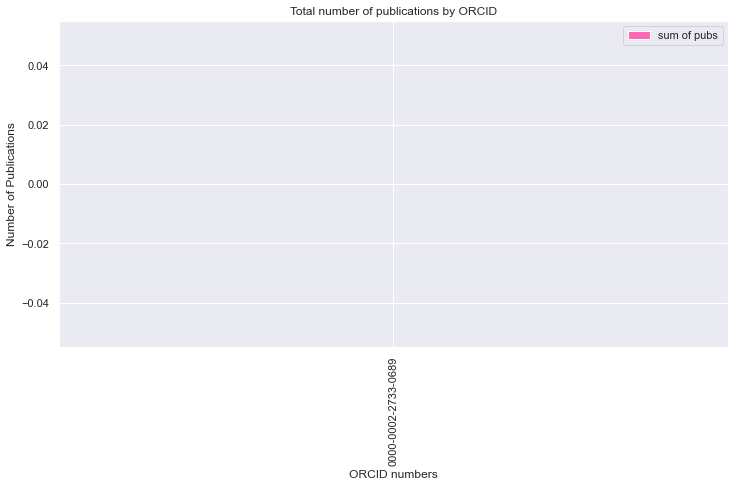

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme() # set seaborn
df.plot.bar(x=None, y='sum of pubs', figsize=(12,6), color='hotpink',\
            ylabel = "Number of Publications", xlabel = "ORCID numbers") # specify bar plot with the x value of track name
plt.title("Total number of publications by ORCID")


#### The catplot below compares schools against the ratio for OA
A bit confusing now, but read the legend as 1 is OA, 0 or inf is not OA

In [34]:
#this swarm plot should accomodate larger numbers of examples...
sns.catplot(x="school", y="sum of pubs", data=df,\
        kind="swarm", hue="OA ratio", height=6, aspect=8/6, s=10)
plt.xlabel("Institution", size = 14)
plt.ylabel("Number of DOIs", size = 14)
plt.title("DOIs by Instituion coded by OA status   1.0=OA", size=16)

ValueError: Could not interpret input 'school'

## Inferential statistics
Oh my goodness...what am I going to get from this mess right here?
<br>
Our sample shows a mean of 10% for OA, with a std of nearly 30%, which suggests someone is doing all the work...

In [250]:
df_mean = df.describe()
print(df_mean)
print("wow - for this population, the average publication is 0.56")

       sum of pubs  Count of OAs  OA ratio
count    30.000000     30.000000      30.0
mean      0.566667      0.100000       inf
std       1.250747      0.305129       NaN
min       0.000000      0.000000       0.0
25%       0.000000      0.000000       0.0
50%       0.000000      0.000000       0.0
75%       1.000000      0.000000       1.0
max       6.000000      1.000000       inf
wow - for this population, the average publication is 0.56


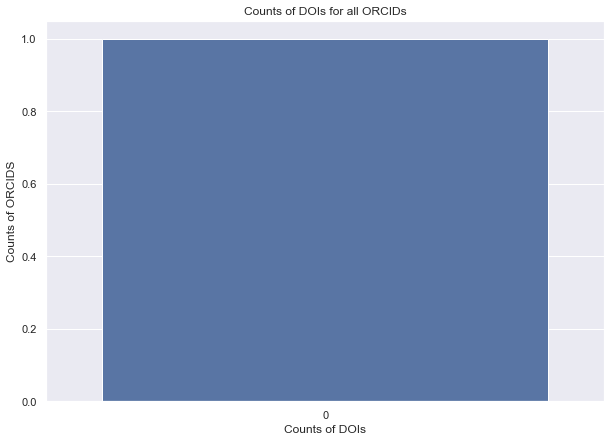

In [35]:
#set default size
sns.set(rc={'figure.figsize':(10,7)})

#create countplot
df_counts = sns.countplot(data=df, x='sum of pubs', order=df['sum of pubs'].value_counts().index)
df_counts
#matplot lib labels
df_counts.set(xlabel='Counts of DOIs', ylabel='Counts of ORCIDS', title='Counts of DOIs for all ORCIDs')

plt.show()

In [36]:

df_sum = df.groupby('school')['Count of OAs'].sum()
df_sum

KeyError: 'school'

# Conclusion
### Orcid.org versus using CrossRef.org API's
The orcid.org API returns more complete data. The CrossRef API returns very few and these were duplicates to what was already in orcid.org. While the CrossRef API returned a nicely filtered result, the orcid.org API is the one to use. It should be noted, that it is not being used as the documentation at orcid.org specifies!! Somehow, this method used here is working around the whole public/member access key issue. If we are to release this monster into the wild, I should invest more time to fully understand what's going on. 

### Its easy to run lots using orcid.org search
Its really easy to run over 100 ORCIDs at a time by cut and pasting the search results into a csv file using Excel. Just remember to save your csv file in your working directory!

### visualizations
I spent so much time just getting this thing working, the visuals are minimal. They deserve more time, however, the data I've been putting into it, just isn't that rich so far. I was expecting a more rich dataset - more DOI's per ORCID. 

### Inferetial statistics
The low numbers for DOIs and OAs did not really provide for good inferential statistics. I was able to cobble together a few descriptive statistics. Would a more selective set of ORCIDs be better? I suspect I need some more variables. 

### association rule mining
This might have been the better route to take. However i would need to create a much more interesting dataset. Perhaps this could be enriched with quatifiable data from elsewhere?

Overall, I'm beyond pleased that this is working and <i>seems</i> to be robust to work with a variety of ORCIDs and provide at least, a simple evaluate of the main goal:<br>
- submit an ORCID
- Obtain a list of DOI's
- find out which DOI's are OA

